In [15]:
#!pip install --user Jpype1==1.2.0 

Note: you may need to restart the kernel to use updated packages.


In [1]:
#!pip install konlpy

In [5]:
#!pip install wordcloud

In [1]:
# import lxml.html
# import requests
# import os
from time import sleep
import random
from selenium.webdriver import Chrome
import matplotlib.pyplot as plt
from collections import Counter

In [2]:
# import nltk 
# from konlpy.tag import Kkma
from konlpy.tag import Okt
from wordcloud import WordCloud

# 검색어 도시숲

In [99]:
url = "https://search.naver.com/search.naver?where=news&sm=tab_jum&query=%EB%8F%84%EC%8B%9C%EC%88%B2&nso=so%3Ar%2Cp%3Aall%2Ca%3Aall"
browser = Chrome()
browser.get(url)
# news_area = browser.find_elements_by_xpath("//div[@class='news_area']/a")
# title = []
# for i in news_area:
#     title.append(i.text)
# title = "".join(title)
# filtered_title = title.replace('.', ' ').replace('"',' ').replace(',',' ').replace("'"," ").replace('·', ' ').replace('=',' ').replace('\n',' ')


In [100]:
title = []
for i in range(100):
    news_area = browser.find_elements_by_xpath("//div[@class='news_area']/a")
    for i in news_area:
        title.append(i.text)
    browser.find_element_by_class_name('btn_next').click()
    sleep(random.uniform(2,4))
title = "".join(title)
filtered_title = title.replace('.', ' ').replace('"',' ').replace(',',' ').replace("'"," ").replace('·', ' ').replace('=',' ').replace('\n',' ')

In [101]:
okt = Okt()

word_kind = []
word_kind = okt.pos(filtered_title) 

noun_adj = []
for word, kind in word_kind:
    if kind in ['Noun' , 'Adjective']: 
        noun_adj.append(word)

counts = Counter(noun_adj)
data = counts.most_common(50)

In [86]:
# tw = Okt() 
# tokens_ko = tw.nouns(filtered_title)
# ko = nltk.Text(tokens_ko, name='기사 내 명사')
# # ko.tokens
# # ko.vocab()
# new_ko=[]
# for word in ko:
#     if len(word) > 1 and word != '단독' and  word != ' ':
#         new_ko.append(word)
# ko = nltk.Text(new_ko, name = '기사 내 명사 두 번째')
# # ko.tokens
# # ko.vocab()
# data = ko.vocab().most_common(50)
# data = dict(data)

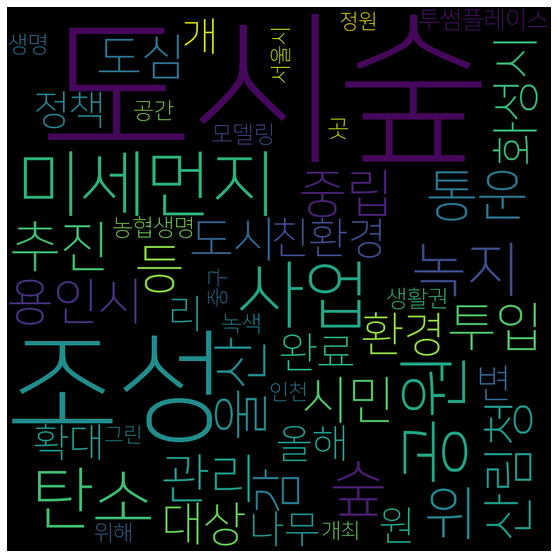

In [102]:
wordcloud = WordCloud().generate(filtered_title)

font = 'C:/Users/guseh/AppData/Local/Microsoft/Windows/Fonts/NanumSquareL.ttf'
wc = WordCloud(font_path=font, background_color="black", width=1000, height=1000,max_words=50, max_font_size=300)
wc = wc.generate_from_frequencies(dict(data))
wc.to_file('test.jpg')
plt.figure(figsize=(10,10))
plt.imshow(wc, interpolation='lanczos')
plt.axis('off')
plt.show()

# 검색어 숲세권

In [3]:
url = "https://search.naver.com/search.naver?sm=tab_hty.top&where=news&query=%EC%88%B2%EC%84%B8%EA%B6%8C&oquery=%EB%8F%84%EC%8B%9C%EC%88%B2+%EA%B5%90%EC%9C%A1&tqi=henUelprvhGss6itfIGssssstPN-405117"
browser = Chrome()
browser.get(url)

title = []
for i in range(100):
    news_area = browser.find_elements_by_xpath("//div[@class='news_area']/a")
    for i in news_area:
        title.append(i.text)
    browser.find_element_by_class_name('btn_next').click()
    sleep(random.uniform(2,4))
title = "".join(title)
filtered_title = title.replace('.', ' ').replace('"',' ').replace(',',' ').replace("'"," ").replace('·', ' ').replace('=',' ').replace('\n',' ')



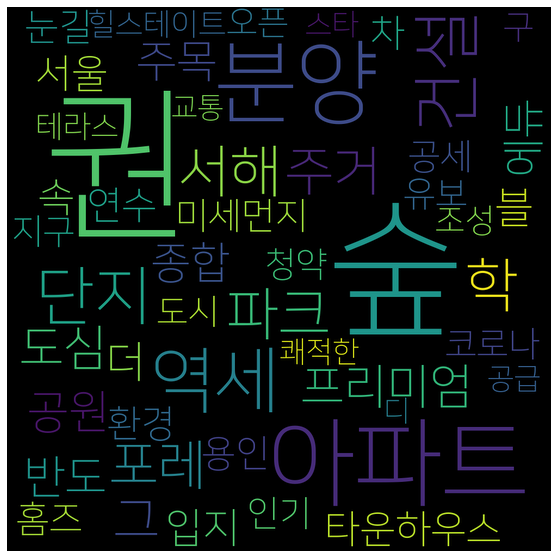

In [5]:
okt = Okt()

word_kind = []
word_kind = okt.pos(filtered_title) 

noun_adj = []
for word, kind in word_kind:
    if kind in ['Noun' , 'Adjective']: 
        noun_adj.append(word)

counts = Counter(noun_adj)
data = counts.most_common(50)

wordcloud = WordCloud().generate(filtered_title)

font = 'C:/Users/guseh/AppData/Local/Microsoft/Windows/Fonts/NanumSquareL.ttf'
wc = WordCloud(font_path=font, background_color="black", width=1000, height=1000,max_words=50, max_font_size=300)
wc = wc.generate_from_frequencies(dict(data))
wc.to_file('test.jpg')
plt.figure(figsize=(10,10))
plt.imshow(wc, interpolation='lanczos')
plt.axis('off')
plt.show()